<a href="https://colab.research.google.com/github/amalpanwar/LLM_image_to_text/blob/main/HuggingFace_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

In [1]:
import torch
from transformers import pipeline
from PIL import Image
import requests
from io import BytesIO
import base64

In [2]:
# Load the image
def load_image(image_path):
    return Image.open(image_path).convert("RGB")

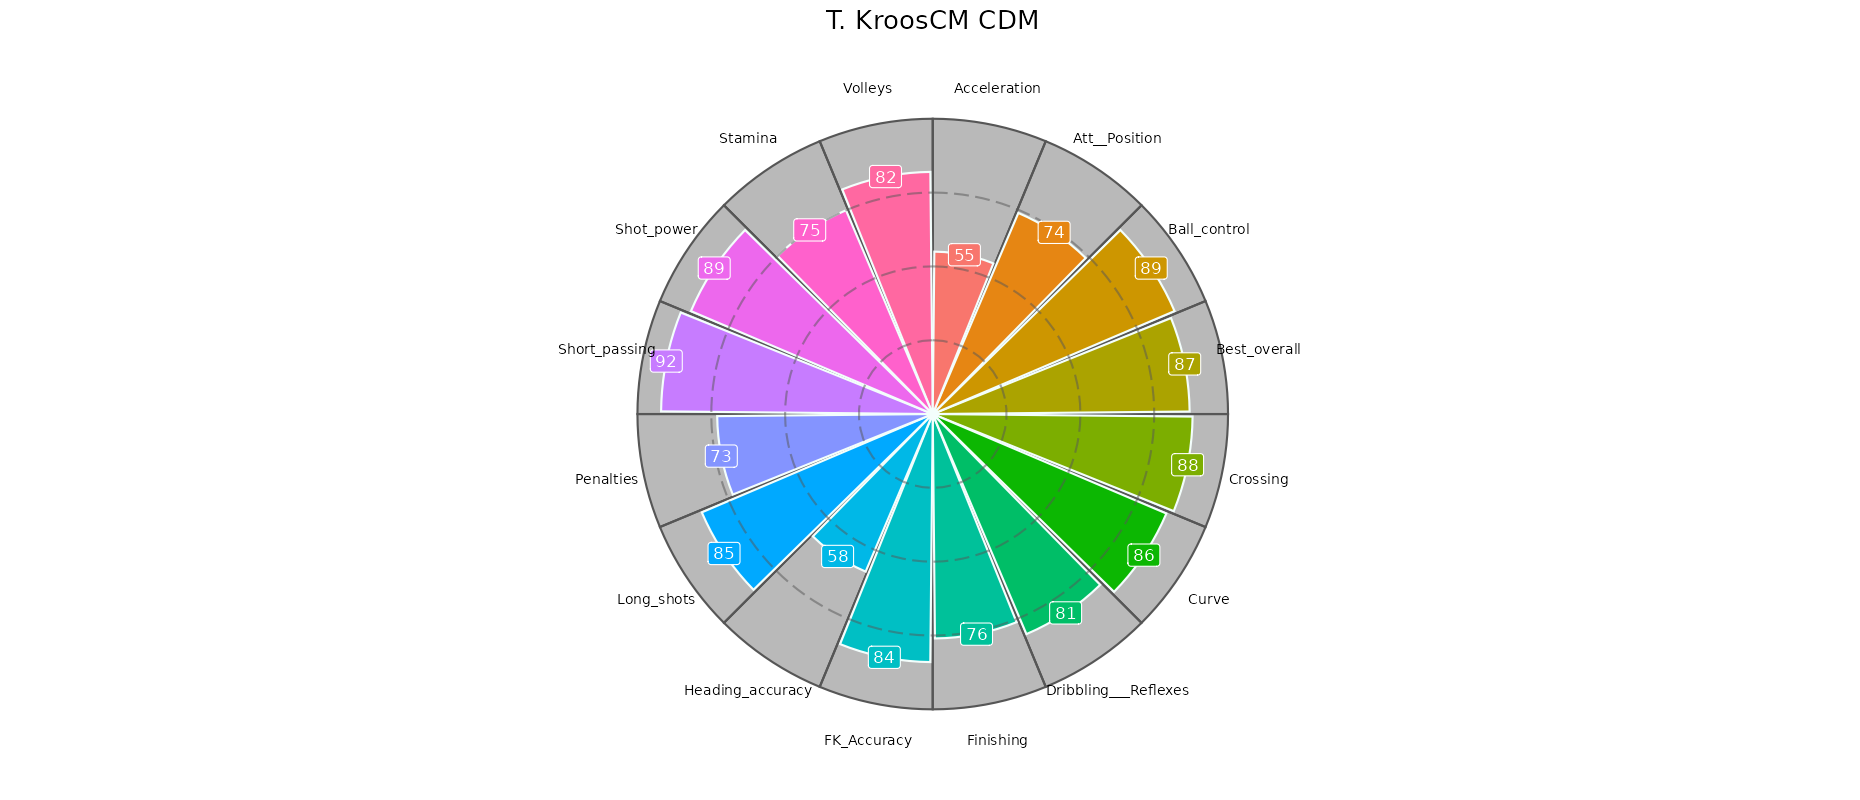

In [33]:
image = load_image("/content/Player1.png")
image

In [34]:
# Initialize the pipeline
pipe = pipeline("visual-question-answering", model="Salesforce/blip-vqa-capfilt-large")

In [35]:
question = "Please provide a detailed description of what is happening in this image, including any relevant activities, objects, and the overall context."
result = pipe(image, question, return_tensors="pt")


In [36]:
result

[{'answer': 'pie chart'}]

In [37]:
print(result[0]['answer'])

pie chart


In [38]:
from transformers import BlipForQuestionAnswering, BlipProcessor

In [39]:
model = BlipForQuestionAnswering.from_pretrained("Salesforce/blip-vqa-capfilt-large")


In [40]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-vqa-capfilt-large")

In [41]:
# Define a more open-ended question for the image
question = "Please provide a detailed description of what is happening in this image, including any relevant activities, objects, and the overall context."



In [42]:
# Prepare inputs for the model
inputs = processor(images=image, text=question, return_tensors="pt")



In [43]:

# Generate answer with increased max_length
output = model.generate(**inputs, max_length=150, num_beams=5)


In [30]:
output

tensor([[30522,  4715,  2447, 10209,  3608,   102]])

In [44]:

# Decode the generated answer
answer = processor.decode(output[0], skip_special_tokens=True)

# Print the result
print(answer)

pie chart
